In [28]:
import warnings
warnings.filterwarnings("ignore")
import os
if os.getcwd().split(os.sep)[-1] == 'notebooks':
    os.chdir('..') # set/ ccwd as the parent directory to make imports easier

import pandas as pd
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

In [39]:
df = pd.read_csv('data/PairedImageSets.csv')
# # randomly pick a difference
diff_choice = df.sample(1).difference.values[0]
df = df[df['difference'] == diff_choice]
df.head()


,group_name,difference,path,url,target,target_name,group
14000,People riding racing horses,Horseback activity (Racing vs Dressage),./data/VisDiffBench/medium/41_a/000001.jpg,https://worldinsidepictures.com/wp-content/upl...,1,medium,208
14001,People riding racing horses,Horseback activity (Racing vs Dressage),./data/VisDiffBench/medium/41_a/000002.jpg,https://thumbs.dreamstime.com/b/stockholm-swed...,1,medium,208
14002,People riding racing horses,Horseback activity (Racing vs Dressage),./data/VisDiffBench/medium/41_a/000003.jpg,https://i.pinimg.com/originals/6f/a7/05/6fa705...,1,medium,208
14003,People riding racing horses,Horseback activity (Racing vs Dressage),./data/VisDiffBench/medium/41_a/000004.jpg,https://thumbs.dreamstime.com/b/two-girls-jock...,1,medium,208
14004,People riding racing horses,Horseback activity (Racing vs Dressage),./data/VisDiffBench/medium/41_a/000005.jpg,https://www.thoughtco.com/thmb/k1fv44OfoXvBbmm...,1,medium,208


Horseback activity (Racing vs Dressage)


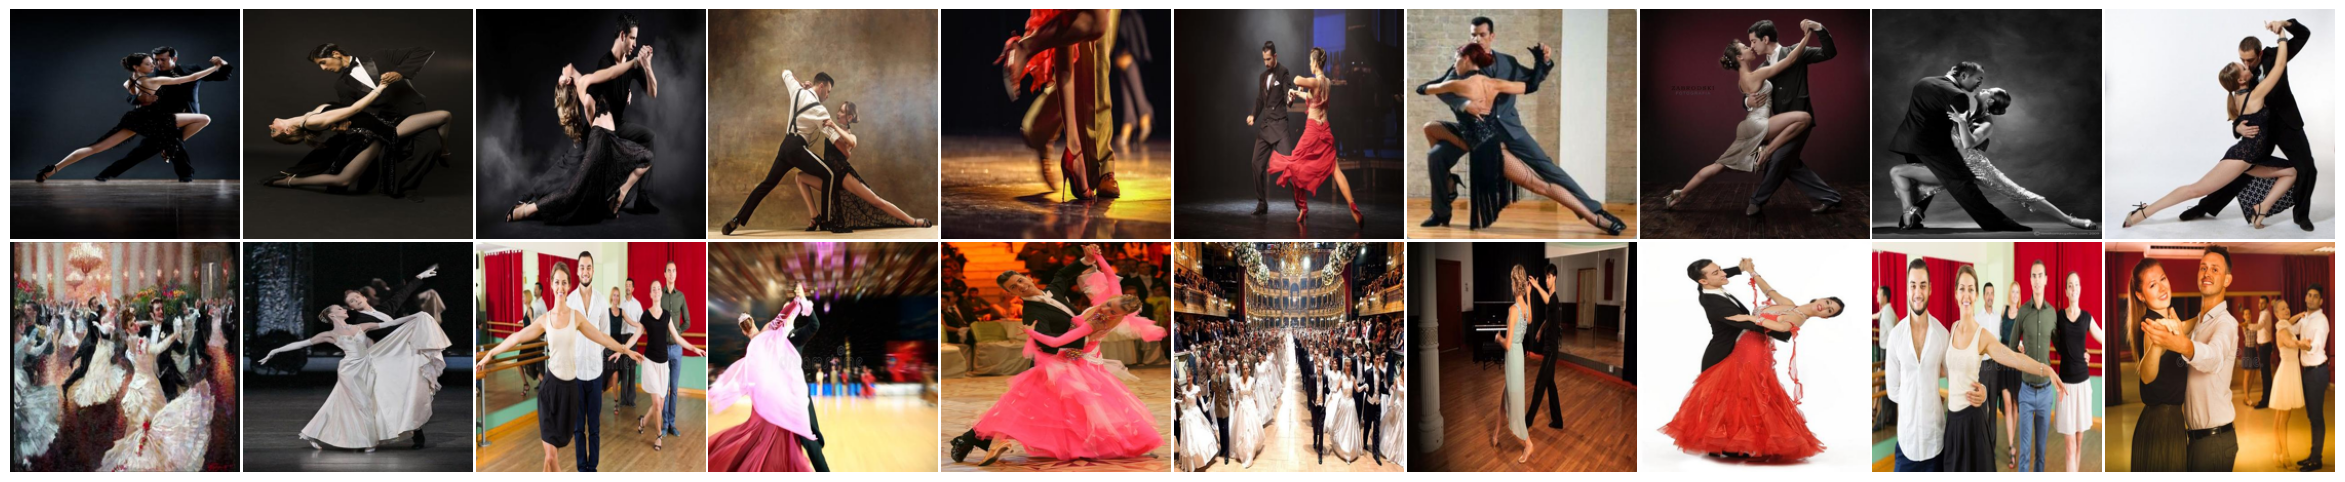

In [40]:
(group_a, group_b) = df['group_name'].unique()
group_a = df[df['group_name'] == group_a].path.values[:10]
group_b = df[df['group_name'] == group_b].path.values[:10]

fig = plt.figure(figsize=(30., 10.))
# set fig title
# fig.suptitle(diff_choice, fontsize=20)
print(diff_choice)
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 10),  # creates 2x2 grid of axes
                 axes_pad=0.03,  # pad between axes in inch.
                 )

for ax, im in zip(grid, list(group_a) + list(group_b)):
    # Iterating over the grid returns the Axes.
    ax.imshow(Image.open(im).convert("RGB").resize((224, 224)))
    ax.axis('off')

In [25]:
df['group_name'].unique()

array(['Cows grazing in a field', 'Sheep grazing in a field'],
      dtype=object)